In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import fcwt

In [2]:
def fcwtplotter(audio_data,sample_rate,f0,f1):
    #make sure signal is a numpy float array
    audio_data = np.array(audio_data, dtype=np.float32)
    audio_data -= np.mean(audio_data)
    # 2. Divide by the maximum absolute value to scale between -1 and 1
    max_val = np.max(np.abs(audio_data))
    if max_val > 0:
        signal = audio_data / max_val


    fn = 100

    fcwt.plot(signal, sample_rate, f0=f0, f1=f1, fn=fn)


In [3]:
def cross_wavelet(signal1, signal2,frame_rate):
    highest = 1100
    freqs, coeffs1 = fcwt.cwt(signal1,frame_rate,200,highest,200,nthreads = 4)
    _, coeffs2 = fcwt.cwt(signal2,frame_rate,200,highest,200,nthreads = 4)

    S12 = coeffs1 * (coeffs2)
    return np.abs(S12),freqs,_

In [4]:
import numpy as np
from pycwt import wct
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.io.wavfile as wav
# Compute the wavelet coherence
def wavelet_coherence(signal1, signal2,frame_rate,f0,f1):

    freqs, coeffs1 = fcwt.cwt(signal1,frame_rate,f0,f1,200,nthreads = 4)
    _, coeffs2 = fcwt.cwt(signal2,frame_rate,f0,f1,200,nthreads = 4)

    # Compute coherence
    S1 = np.abs(coeffs1) ** 2
    S2 = np.abs(coeffs2) ** 2
    S12 = coeffs1 * np.conj(coeffs2)
    
    # Smooth spectra and cross-spectrum
    def smooth(data, sigma=(2,2), mode='nearest'):
        #return data
        return gaussian_filter(data, sigma=sigma, mode=mode)

    S1_smoothed = smooth(S1)
    S2_smoothed = smooth(S2)
    S12_smoothed = smooth(np.abs(S12) ** 2)

    # Coherence calculation
    coherence = S12_smoothed / (((S1_smoothed) **2) * ((S2_smoothed)**2))
    coherence = S12_smoothed / (np.sqrt(S1_smoothed) * np.sqrt(S2_smoothed))
    #coherence = np.clip(coherence, 0.0, 1.0)  # Limit coherence to [0, 1]

    return coherence, freqs, [coeffs1,coeffs2]


In [17]:
import datetime
import numpy as np
from scipy.signal import detrend
import requests

def pull_data(ticker, api_key):
    """
    Pull and detrend stock data from the past 5 hours using Polygon.io.

    Parameters:
    ticker (str): Stock ticker symbol.
    api_key (str): Your Polygon.io API key.

    Returns:
    times (array): Array of timestamps.
    close (array): Closing prices.
    detrended_close (array): Detrended closing prices.
    stock_data (DataFrame): Raw stock data from Polygon.
    """
    # Define the date range
    end_datetime = datetime.datetime(2025, 2, 12, 16)
    start_datetime = end_datetime - datetime.timedelta(hours=5)

    # Convert to timestamp format for Polygon API
    start_timestamp = int(start_datetime.timestamp()) * 1000
    end_timestamp = int(end_datetime.timestamp()) * 1000

    # Polygon API endpoint for aggregate bars
    url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/minute/{start_datetime.date()}/{end_datetime.date()}?adjusted=true&apiKey={api_key}"
    
    # Fetch the data
    response = requests.get(url)
    data = response.json()

    if 'results' not in data:
        raise ValueError(f"Error fetching data: {data}")

    # Convert data to arrays
    times = np.array([entry['t'] for entry in data['results']])  # Timestamps
    close = np.array([entry['c'] for entry in data['results']])  # Closing prices

    # Detrend closing prices
    detrended_close = detrend(close)

    return times, close, detrended_close, data
# Example usage:
key = 'jjeryxeZXNkBhTEQF0SDj8uBBI_N1dBM'	
ticker = 'AAPL'
_,close,detrended,df= pull_data(ticker,key)

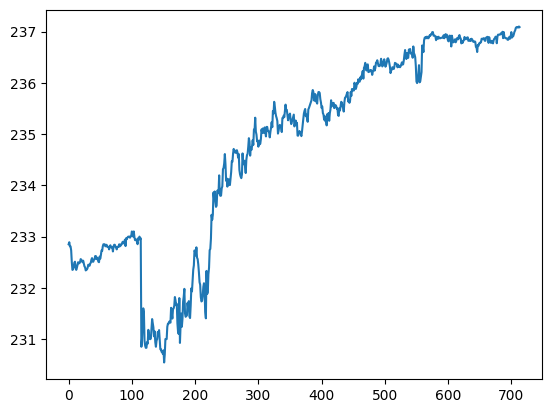

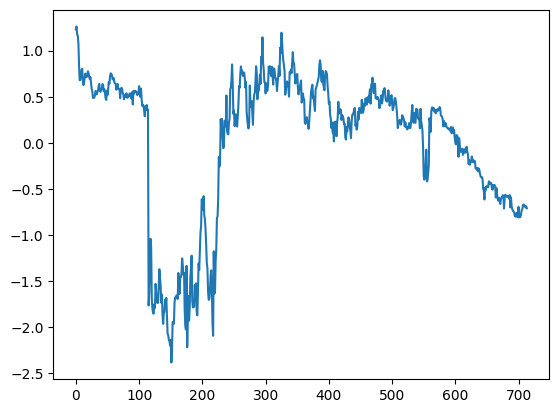

In [20]:
plt.plot(close)
plt.figure()
plt.plot(detrended)

In [10]:
import datetime
import yfinance as yf
end_date = datetime.datetime(2025,2,12,16)
start_date = end_date - datetime.timedelta(hours = 5)
stock_data = yf.download('AAPL', start=start_date, end=end_date,interval='1m')


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [ ]:
fcwt.plot(pull_data('AAPL')[2],1/10)

[*********************100%***********************]  1 of 1 completed


TypeError: in method 'new_Scales', argument 3 of type 'int'

[*********************100%***********************]  1 of 1 completed


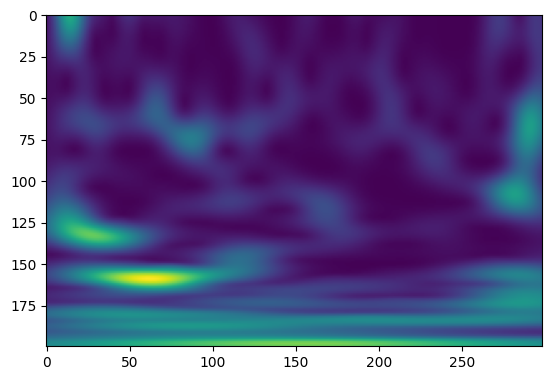

In [ ]:
coh,_,_ = wavelet_coherence(detrended,pull_data(ticker)[2],200,1,60)
plt.imshow(coh)

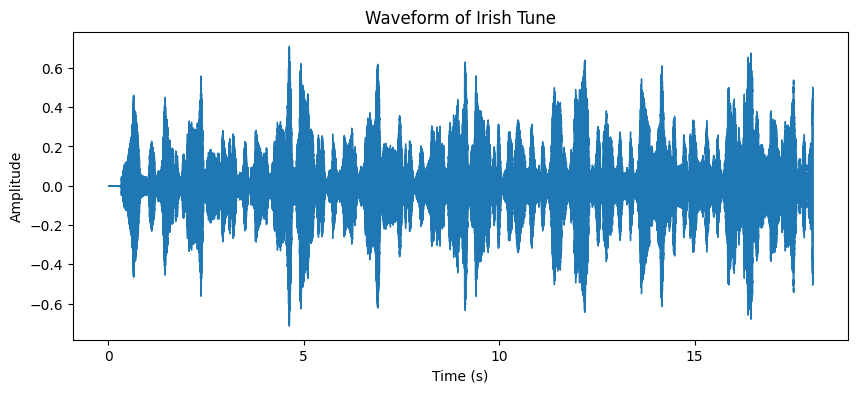

In [ ]:
import numpy as np
import pywt
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an Irish tune (e.g., "The Sailor's Bonnet")
audio_file = "kerry_reel_burke.wav"
y, sr = librosa.load(audio_file, sr=None)  # Load with original sample rate

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Irish Tune")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


C:\Users\24261951\AppData\Local\Temp\ipykernel_10140\1017165483.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


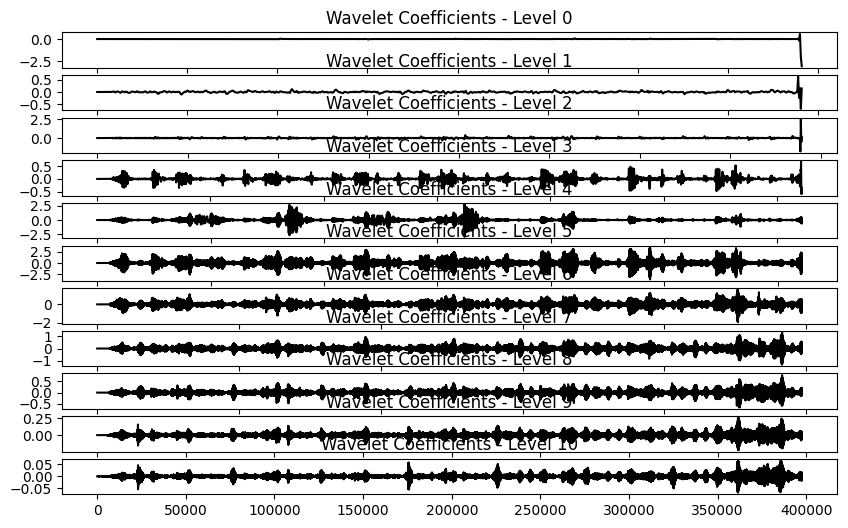

In [301]:
# Perform DWT using Daubechies wavelet
wavelet_name = "db4"
coeffs = pywt.wavedec(y, wavelet_name, level=10)

# Plot wavelet coefficients at each level
plt.figure(figsize=(10, 6))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(coeff, color='black')
    plt.title(f"Wavelet Coefficients - Level {i}")
plt.tight_layout()
plt.show()


C:\Users\24261951\AppData\Local\Temp\ipykernel_10140\1711856242.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_signal = wavfile.read(file_path)


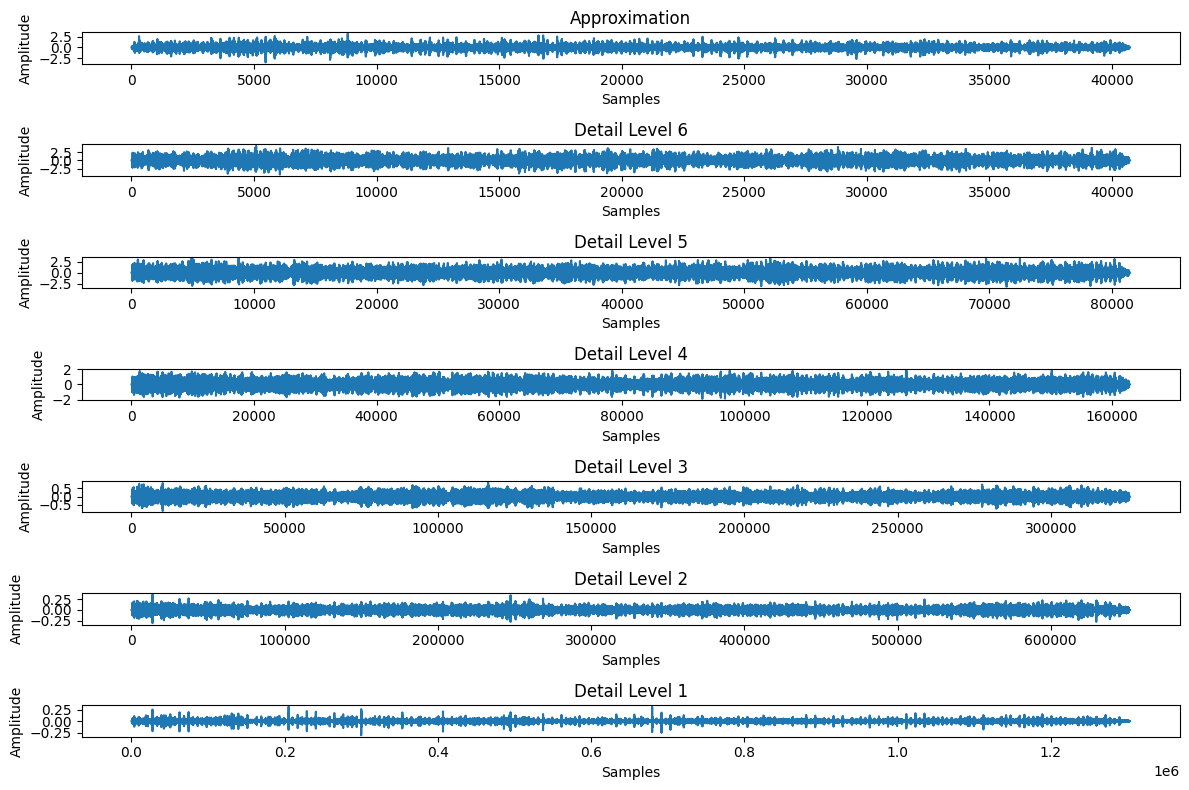

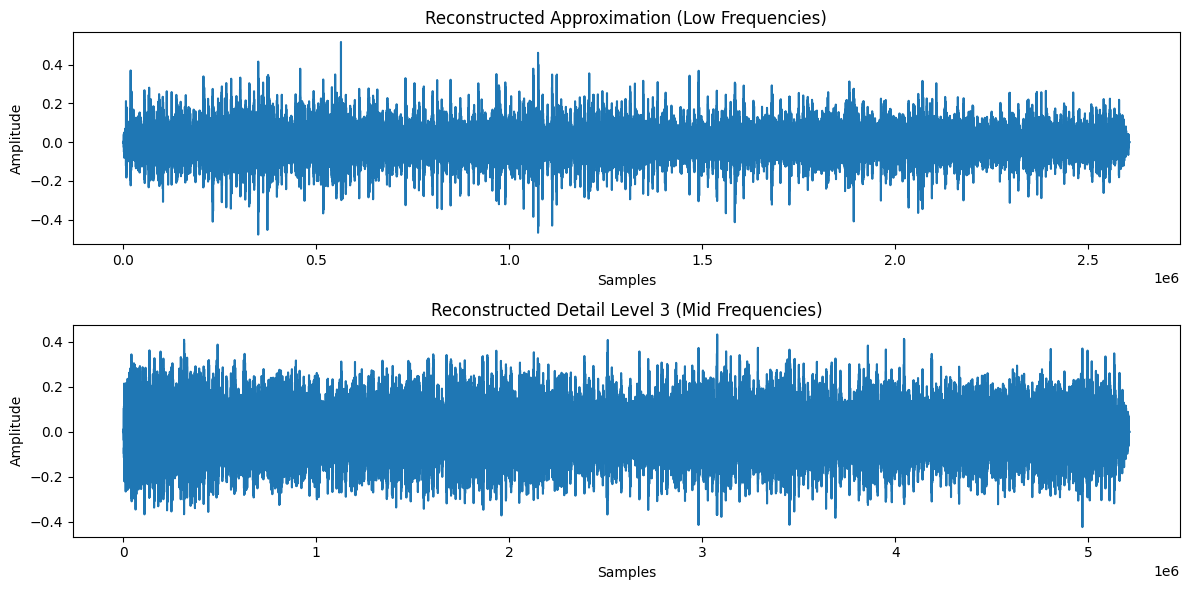

Energy of each level: [9251.647904017615, 36247.95529637436, 38576.81770668461, 22171.853459804675, 5761.553889828594, 794.4177043925989, 246.68022949204052]


In [347]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load an Irish music audio file
file_path = "monroes.wav"  # Replace with your file path
sample_rate, audio_signal = wavfile.read(file_path)

# If stereo, convert to mono
if len(audio_signal.shape) > 1:
    audio_signal = audio_signal.mean(axis=1)

# Normalize the signal
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# Parameters for DWT
wavelet = 'db4'  # Daubechies 4 wavelet (good for music analysis)
level = 6  # Number of decomposition levels

# Perform Discrete Wavelet Transform (DWT)
coeffs = pywt.wavedec(audio_signal, wavelet, level=level)

# Plot the wavelet coefficients
plt.figure(figsize=(12, 8))
titles = ['Approximation'] + [f'Detail Level {i}' for i in range(level, 0, -1)]
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs), 1, i + 1)
    plt.plot(coeff)
    plt.title(titles[i])
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Reconstruct specific frequency bands (optional)
# Example: Reconstruct the approximation (low-frequency components)
reconstructed_approx = pywt.waverec([coeffs[0]] + [None] * level, wavelet)

# Example: Reconstruct detail level 3 (mid-frequency components)
reconstructed_detail_3 = pywt.waverec([coeffs[3],None,None,None,None,None], wavelet)

# Plot the reconstructed signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(reconstructed_approx)
plt.title("Reconstructed Approximation (Low Frequencies)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(reconstructed_detail_3)
plt.title("Reconstructed Detail Level 3 (Mid Frequencies)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Feature extraction: Calculate energy of each level
energy = [np.sum(np.square(coeff)) for coeff in coeffs]
print("Energy of each level:", energy)